In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
sns.set_theme()
sns.set_style("darkgrid")
# sns.set_context("paper")
# sns.set_context("talk")

In [13]:
ax_order = 'first'
ax_order_str = 'axF'

In [14]:
with open('../../results/corr_results_mlp.P', 'rb') as f:
    mlp_results = pickle.load(f)   

with open('../../results/corr_%s_results_rnn.P' %(ax_order_str), 'rb') as f:
    rnn_results = pickle.load(f)


In [15]:
dist_mlp = mlp_results['dist_results']
dist_rnn = rnn_results['dist_results']

In [16]:
run=7
cp=-1

# plot only hidds

ttest rnn hidd: Ttest_indResult(statistic=6.438833203396173, pvalue=1.295351921716579e-08)
ttest mlp hidd: Ttest_indResult(statistic=1.0193858057266385, pvalue=0.31153014421226505)


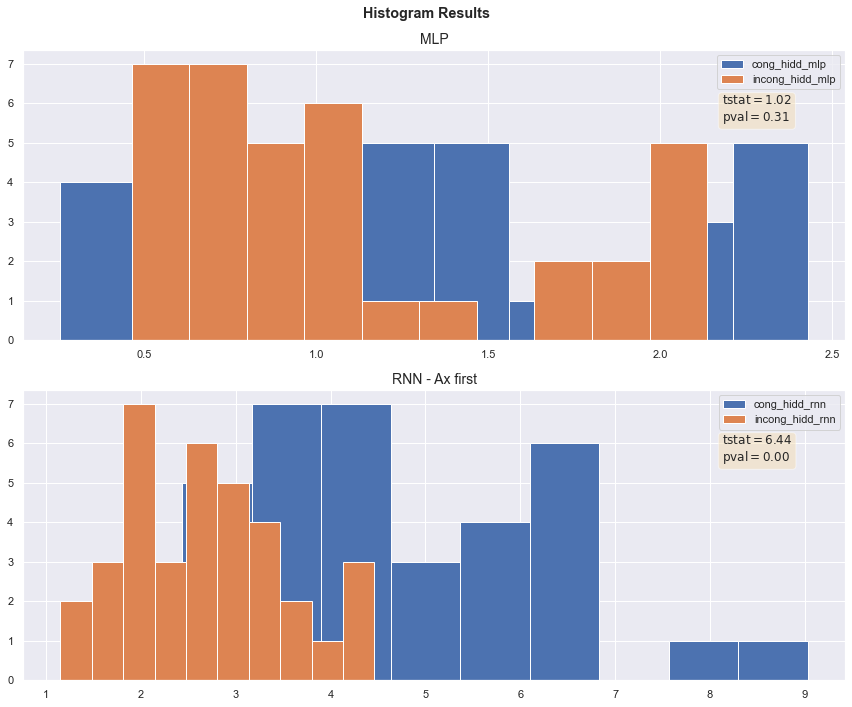

In [17]:
fig, axs = plt.subplots(2, 1, figsize=[12,10])

cong_hidd_mlp    = dist_mlp['cong_hidd_dists'][run][cp]
incong_hidd_mlp  = dist_mlp['incong_hidd_dists'][run][cp]

cong_hidd_rnn    = dist_rnn['cong_hidd_dists'][run][cp]
incong_hidd_rnn  = dist_rnn['incong_hidd_dists'][run][cp]

print('ttest rnn hidd:', ttest_ind(cong_hidd_rnn, incong_hidd_rnn))
print('ttest mlp hidd:', ttest_ind(cong_hidd_mlp, incong_hidd_mlp))
ttest_rnn = ttest_ind(cong_hidd_rnn, incong_hidd_rnn)
ttest_mlp = ttest_ind(cong_hidd_mlp, incong_hidd_mlp)

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax = axs[0]
ax.hist(cong_hidd_mlp)
ax.hist(incong_hidd_mlp)
ax.set_title('MLP', fontsize='14')
hidd_lg = ['cong_hidd_mlp', 'incong_hidd_mlp'] 
ax.legend(hidd_lg)
textstr = '\n'.join((
              r'$\mathrm{tstat}=%.2f$' % (ttest_mlp[0], ),
              r'$\mathrm{pval}=%.2f$' % (ttest_mlp[1], )))
ax.text(0.85, 0.85, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

ax = axs[1]
ax.hist(cong_hidd_rnn)
ax.hist(incong_hidd_rnn)
ax.set_title('RNN - Ax %s' %(ax_order), fontsize='14')
hidd_lg = ['cong_hidd_rnn', 'incong_hidd_rnn']
ax.legend(hidd_lg)
textstr = '\n'.join((
              r'$\mathrm{tstat}=%.2f$' % (ttest_rnn[0], ),
              r'$\mathrm{pval}=%.2f$' % (ttest_rnn[1], )))
ax.text(0.85, 0.85, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

fig.suptitle('Histogram Results', fontweight='bold')
plt.tight_layout()   

fig_str = '%s_hist_both_models_hidds' %(ax_order_str)
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
                bbox_inches = 'tight', pad_inches = 0)


### Both models together

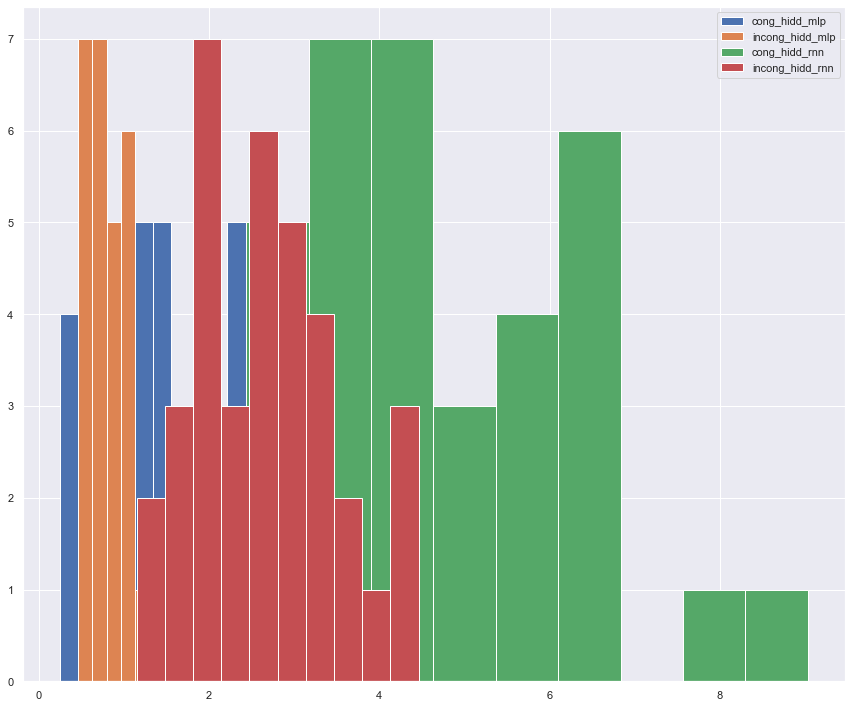

In [18]:
fig, axs = plt.subplots(figsize=[12,10])

cong_hidd_mlp    = dist_mlp['cong_hidd_dists'][run][cp]
incong_hidd_mlp  = dist_mlp['incong_hidd_dists'][run][cp]

cong_hidd_rnn    = dist_rnn['cong_hidd_dists'][run][cp]
incong_hidd_rnn  = dist_rnn['incong_hidd_dists'][run][cp]

ax = axs
ax.hist(cong_hidd_mlp)
ax.hist(incong_hidd_mlp)
ax.hist(cong_hidd_rnn)
ax.hist(incong_hidd_rnn)
hidd_lg = ['cong_hidd_mlp', 'incong_hidd_mlp', 'cong_hidd_rnn', 'incong_hidd_rnn']
ax.legend(hidd_lg)

plt.tight_layout()
plt.show()        


# plot embeddings and hidds 

In [19]:
def plot_hist(dist_mlp, dist_rnn, run, cp):
    fig, axs = plt.subplots(2, 2, figsize=[10,8])

    cong_embed_mlp   = dist_mlp['cong_embed_dists'][run][cp]
    incong_embed_mlp = dist_mlp['incong_embed_dists'][run][cp]
    cong_hidd_mlp    = dist_mlp['cong_hidd_dists'][run][cp]
    incong_hidd_mlp  = dist_mlp['incong_hidd_dists'][run][cp]

    cong_embed_rnn   = dist_rnn['cong_embed_dists'][run][cp]
    incong_embed_rnn = dist_rnn['incong_embed_dists'][run][cp]
    cong_hidd_rnn    = dist_rnn['cong_hidd_dists'][run][cp]
    incong_hidd_rnn  = dist_rnn['incong_hidd_dists'][run][cp]

    print('ttest rnn hidd:', ttest_ind(cong_hidd_rnn, incong_hidd_rnn))
    print('ttest mlp hidd:', ttest_ind(cong_hidd_mlp, incong_hidd_mlp))

    ax = axs[0][0]
    ax.hist(cong_embed_mlp, bins=7)
    ax.hist(incong_embed_mlp, bins=7)
    embed_lg = ['cong_embed_mlp', 'incong_embed_mlp']
    ax.legend(embed_lg)

    ax=axs[0][1]
    ax.hist(cong_embed_rnn, bins=7)
    ax.hist(incong_embed_rnn, bins=7)
    embed_lg = ['cong_embed_rnn', 'incong_embed_rnn']
    ax.legend(embed_lg)

    ax=axs[1][0]
    ax.hist(cong_hidd_mlp, bins=7)
    ax.hist(incong_hidd_mlp, bins=7)
    hidd_lg = ['cong_hidd_mlp', 'incong_hidd_mlp']
    ax.legend(hidd_lg)

    ax=axs[1][1]
    ax.hist(cong_hidd_rnn, bins=7)
    ax.hist(incong_hidd_rnn, bins=7)
    hidd_lg = ['cong_hidd_rnn', 'incong_hidd_rnn']
    ax.legend(hidd_lg)

    # plt.tight_layout()
  
    return fig, axs     


In [20]:
def save_fig(fig, title, fig_str):
    fig.suptitle(title)
    fig.savefig(('../../figures/' + fig_str + '.pdf'), 
                bbox_inches = 'tight', pad_inches = 0)

ttest rnn hidd: Ttest_indResult(statistic=6.438833203396173, pvalue=1.295351921716579e-08)
ttest mlp hidd: Ttest_indResult(statistic=1.0193858057266385, pvalue=0.31153014421226505)


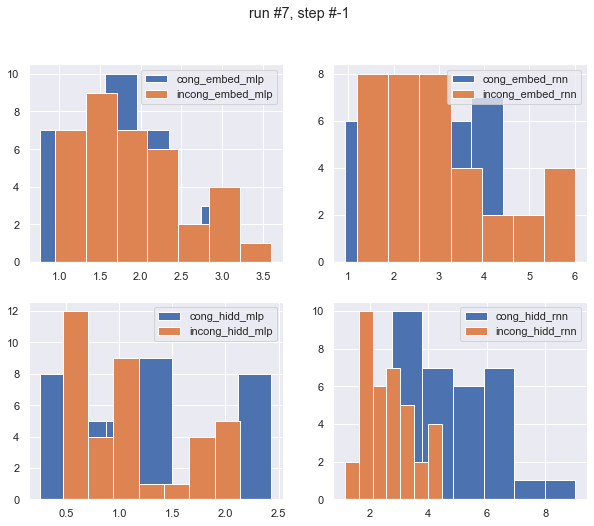

In [21]:
fig, axs = plot_hist(dist_mlp, dist_rnn, run, cp)
fig_str = '%s_hist_cong_incong' %(ax_order_str)
title = 'run #%s, step #%s' %(run, cp)
save_fig(fig, title, fig_str)

## plot both models together

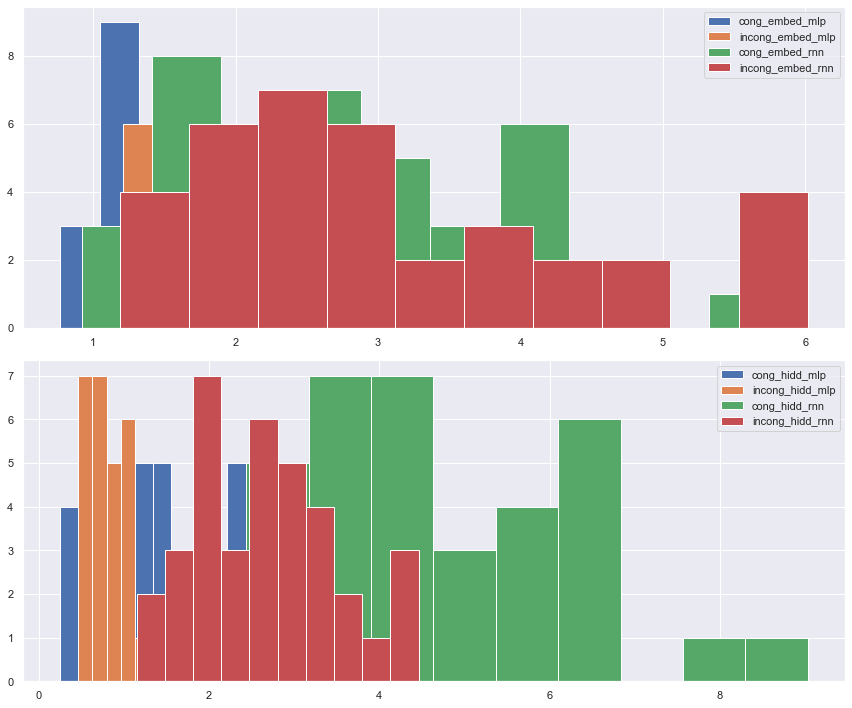

In [22]:
# runs = int(dist_mlp['cong_embed_dists'].shape[0]/4)
# checkpoints = int(dist_mlp['cong_embed_dists'].shape[1]/4)
fig, axs = plt.subplots(2, 1, figsize=[12,10])
cong_embed_mlp   = dist_mlp['cong_embed_dists'][run][cp]
incong_embed_mlp = dist_mlp['incong_embed_dists'][run][cp]
cong_hidd_mlp    = dist_mlp['cong_hidd_dists'][run][cp]
incong_hidd_mlp  = dist_mlp['incong_hidd_dists'][run][cp]

cong_embed_rnn   = dist_rnn['cong_embed_dists'][run][cp]
incong_embed_rnn = dist_rnn['incong_embed_dists'][run][cp]
cong_hidd_rnn    = dist_rnn['cong_hidd_dists'][run][cp]
incong_hidd_rnn  = dist_rnn['incong_hidd_dists'][run][cp]


ax = axs[0]
ax.hist(cong_embed_mlp)
ax.hist(incong_embed_mlp)
ax.hist(cong_embed_rnn)
ax.hist(incong_embed_rnn)
embed_lg = ['cong_embed_mlp', 'incong_embed_mlp', 'cong_embed_rnn', 'incong_embed_rnn']
ax.legend(embed_lg)

ax=axs[1]
ax.hist(cong_hidd_mlp)
ax.hist(incong_hidd_mlp)
ax.hist(cong_hidd_rnn)
ax.hist(incong_hidd_rnn)
hidd_lg = ['cong_hidd_mlp', 'incong_hidd_mlp', 'cong_hidd_rnn', 'incong_hidd_rnn']
ax.legend(hidd_lg)

# ax.set_title('MLP vs RNN')
plt.tight_layout()
plt.show()        
